# Covid-19's Impact on Airport Traffic

In [5]:
# Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
# Read in the data

airtraveldata = pd.read_csv("covid_impact_on_airport_traffic.csv")

airtraveldata.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [4]:
airtraveldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


### Column Info

**There are 11 columns:**

* Aggregation Method:Period used to aggregate data
* Date: Date in YYYY-MM-DD format
* Version: Version of data entry
* AirportName: Name of the airport
* PercentOfBaseline: 1st feb to 15 Mar 2020 is the baseline period used to compute changes in air traffic 
* Centroid: Centroid of the airport's polygon
* City: City where airport is located
* State: State where airport is located
* ISO_3166_2: ISO standard for country identification (abbreviations)
* Country: Country where airport is located
* Geography: Aiport's polygon

In [7]:
#Make date column a datetime object
airtraveldata['Date'] = pd.to_datetime(airtraveldata['Date'])


In [10]:
#Create a month column
airtraveldata['Month'] = airtraveldata['Date'].map(lambda x: x.month)

In [11]:
airtraveldata

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,Month
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",4
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",4
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",7
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",9
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",10
...,...,...,...,...,...,...,...,...,...,...,...,...
7242,Daily,2020-06-05,1.0,Seattle-Tacoma International,80,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1...",6
7243,Daily,2020-10-03,1.0,Seattle-Tacoma International,55,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1...",10
7244,Daily,2020-07-16,1.0,Seattle-Tacoma International,76,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1...",7
7245,Daily,2020-07-31,1.0,Seattle-Tacoma International,69,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1...",7


Flights were pretty propotional across the months. The least number of flights were recorded in December.

<AxesSubplot:ylabel='Month'>

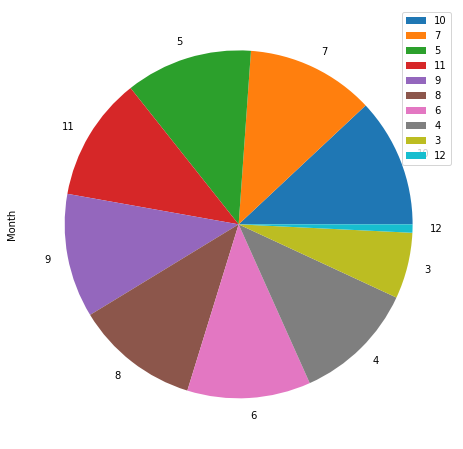

In [18]:
travelbymonth = pd.DataFrame(airtraveldata['Month'].value_counts())


travelbymonth.plot.pie(y = 'Month',figsize=(10,8))

More than half of the flights were from the USA followed by Canada.

<AxesSubplot:ylabel='Country'>

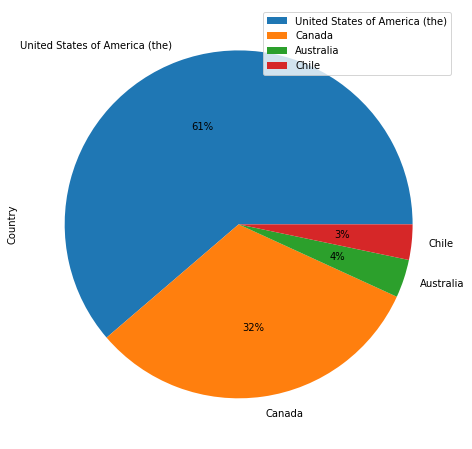

In [21]:
travelbycountry = pd.DataFrame(airtraveldata['Country'].value_counts())


travelbycountry.plot.pie(y = 'Country',figsize=(10,8), autopct = '%.0f%%')

<AxesSubplot:xlabel='Country'>

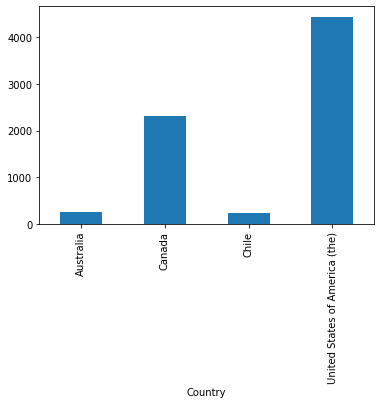

In [34]:
airtraveldata.groupby(['Country'])['AirportName'].count().plot(kind = )

Below we can see how air travel fluctuated over time for all the airports in Canada.

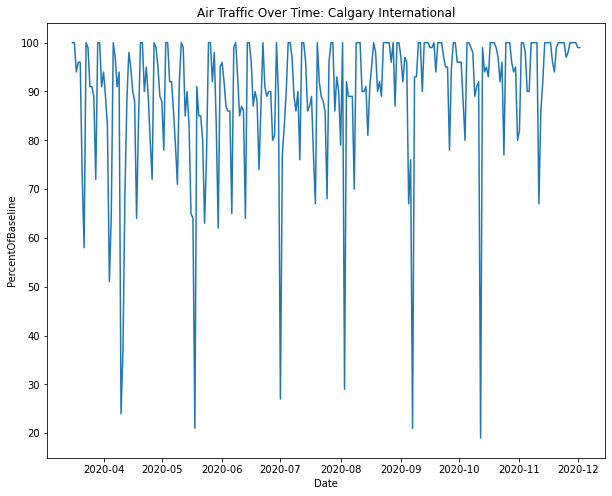

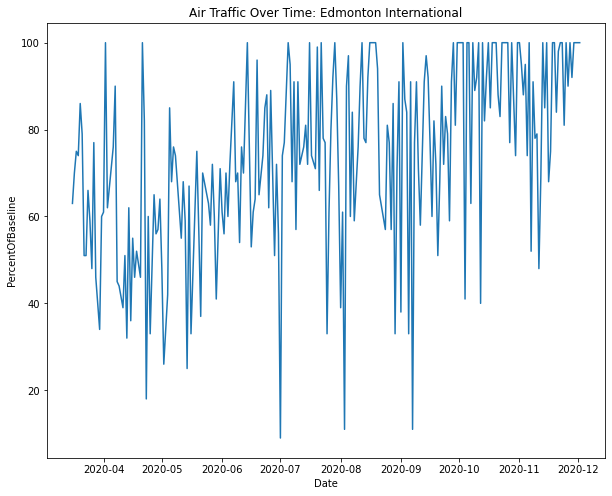

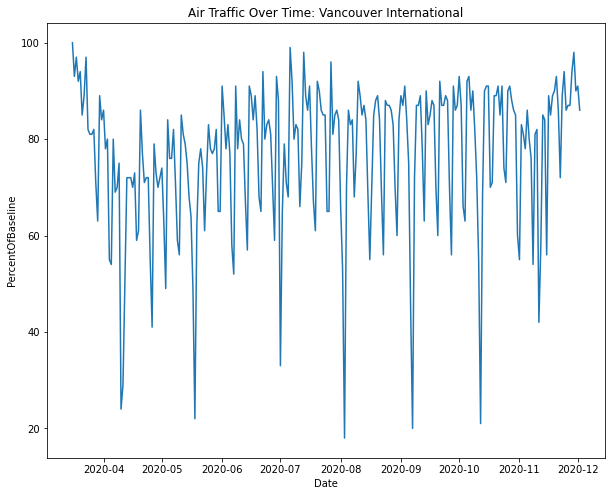

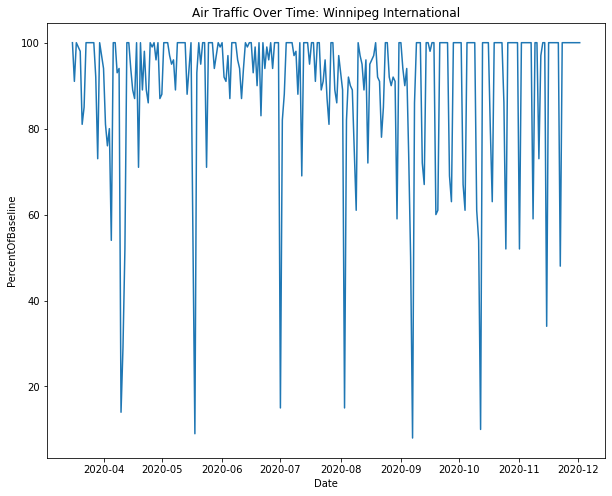

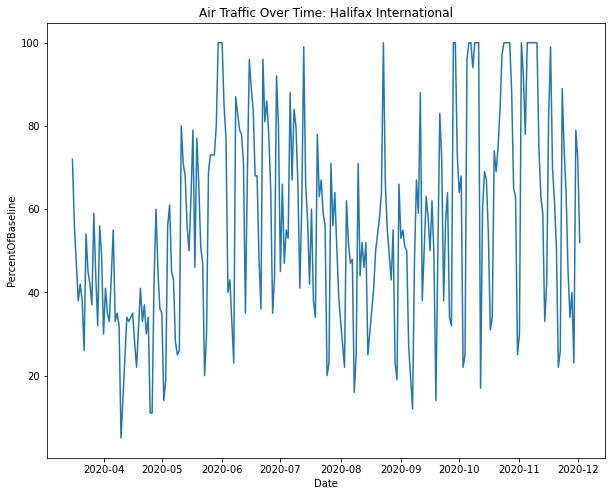

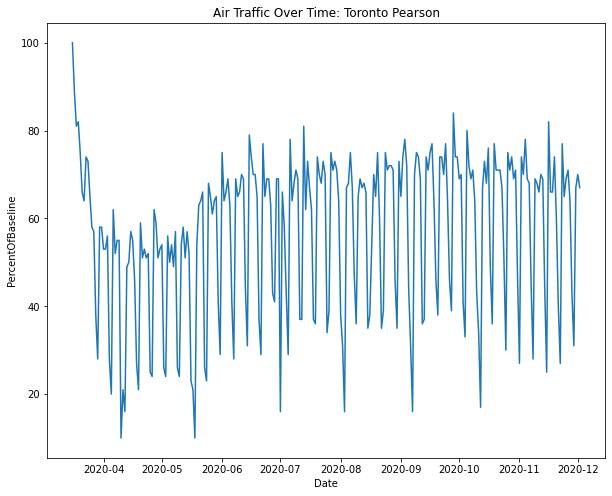

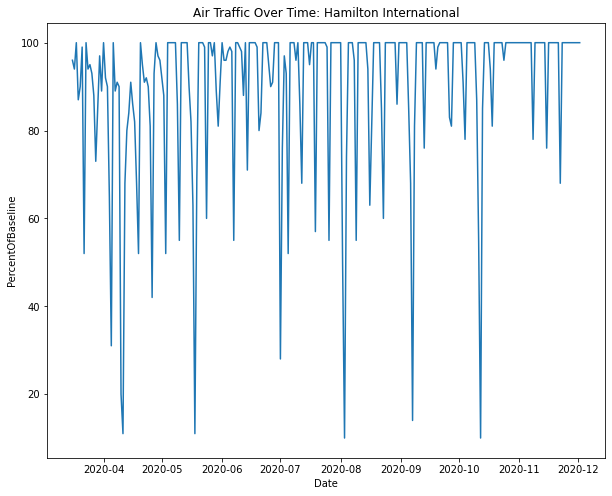

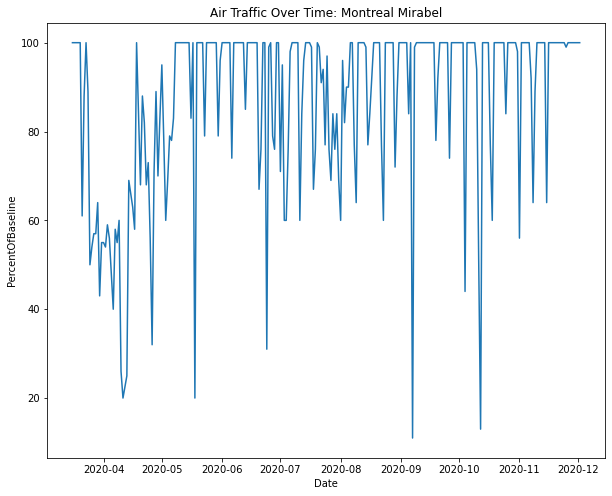

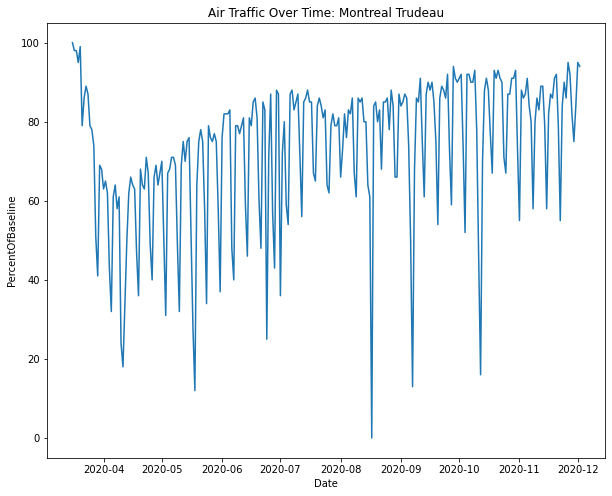

In [23]:
Canadadata = airtraveldata[airtraveldata['Country']=='Canada']
Canadaairports = Canadadata['AirportName'].unique()

for airport in Canadaairports:
    plt.figure(figsize=(10,8))
    sns.lineplot(data = Canadadata[Canadadata['AirportName'] == airport], x = 'Date', y = 'PercentOfBaseline')
    plt.title("Air Traffic Over Time: " + airport)

In [26]:
Canadadata[Canadadata['Month'] == 6]

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,Month
500,Daily,2020-06-10,1.0,Calgary International,85,POINT(-114.013122872131 51.1184753727795),Calgary,Alberta,CA-AB,Canada,"POLYGON((-113.981866836548 51.1392131913567, -...",6
518,Daily,2020-06-12,1.0,Calgary International,86,POINT(-114.013122872131 51.1184753727795),Calgary,Alberta,CA-AB,Canada,"POLYGON((-113.981866836548 51.1392131913567, -...",6
519,Daily,2020-06-23,1.0,Calgary International,91,POINT(-114.013122872131 51.1184753727795),Calgary,Alberta,CA-AB,Canada,"POLYGON((-113.981866836548 51.1392131913567, -...",6
522,Daily,2020-06-19,1.0,Calgary International,88,POINT(-114.013122872131 51.1184753727795),Calgary,Alberta,CA-AB,Canada,"POLYGON((-113.981866836548 51.1392131913567, -...",6
534,Daily,2020-06-20,1.0,Calgary International,74,POINT(-114.013122872131 51.1184753727795),Calgary,Alberta,CA-AB,Canada,"POLYGON((-113.981866836548 51.1392131913567, -...",6
...,...,...,...,...,...,...,...,...,...,...,...,...
2766,Daily,2020-06-30,1.0,Montreal Trudeau,87,POINT(-73.7424121584688 45.4678436940192),Dorval,Quebec,CA-QC,Canada,"POLYGON((-73.751757144928 45.44954912446, -73....",6
2769,Daily,2020-06-11,1.0,Montreal Trudeau,79,POINT(-73.7424121584688 45.4678436940192),Dorval,Quebec,CA-QC,Canada,"POLYGON((-73.751757144928 45.44954912446, -73....",6
2770,Daily,2020-06-25,1.0,Montreal Trudeau,71,POINT(-73.7424121584688 45.4678436940192),Dorval,Quebec,CA-QC,Canada,"POLYGON((-73.751757144928 45.44954912446, -73....",6
2779,Daily,2020-06-28,1.0,Montreal Trudeau,43,POINT(-73.7424121584688 45.4678436940192),Dorval,Quebec,CA-QC,Canada,"POLYGON((-73.751757144928 45.44954912446, -73....",6


Not the clearest graph. This might be better as a heatmap in plotly where the percent of baseline is aggregated by mean.

<AxesSubplot:xlabel='Date', ylabel='PercentOfBaseline'>

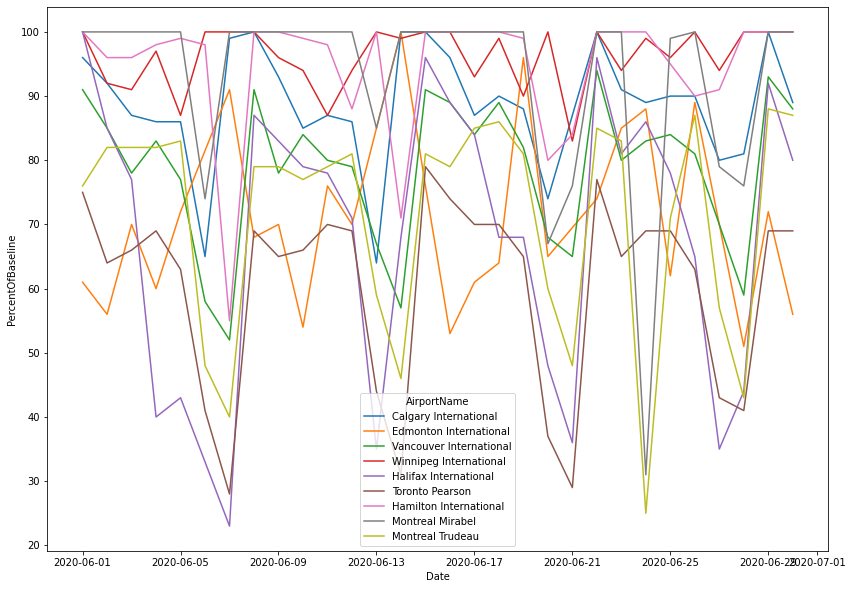

In [31]:
plt.figure(figsize = (14,10))
sns.lineplot(data = Canadadata[Canadadata['Month'] == 6], x = 'Date',y = 'PercentOfBaseline', hue = 'AirportName')

Dallas Fortworth International airport hit 0% of baseline at some point in August. 

In [50]:
#Look at summary statistics for USA Airports
USAdata = airtraveldata[airtraveldata['Country']=='United States of America (the)']
USAdata.groupby(['AirportName'])['PercentOfBaseline'].describe()

,count,mean,std,min,25%,50%,75%,max
AirportName,,,,,,,,
Boston Logan International,261.0,64.704981,8.730645,32.0,60.00,64.0,68.00,97.0
Charlotte Douglas International,261.0,75.375479,16.645305,16.0,66.00,77.0,87.00,100.0
Chicago OHare International,261.0,73.084291,10.516314,21.0,69.00,75.0,80.00,95.0
Dallas/Fort Worth International,262.0,75.293893,18.189548,0.0,65.25,78.0,89.75,100.0
Daniel K. Inouye International,261.0,84.628352,11.720618,31.0,80.00,86.0,92.00,100.0
Denver International,261.0,56.095785,14.979808,12.0,48.00,58.0,68.00,94.0
Detroit Metropolitan Wayne County,261.0,47.432950,8.443039,22.0,43.00,48.0,52.00,84.0
Hartsfield-Jackson Atlanta International,262.0,61.706107,9.478827,0.0,58.00,62.0,66.00,93.0
John F. Kennedy International,262.0,63.072519,15.194224,0.0,53.00,60.0,75.00,93.0


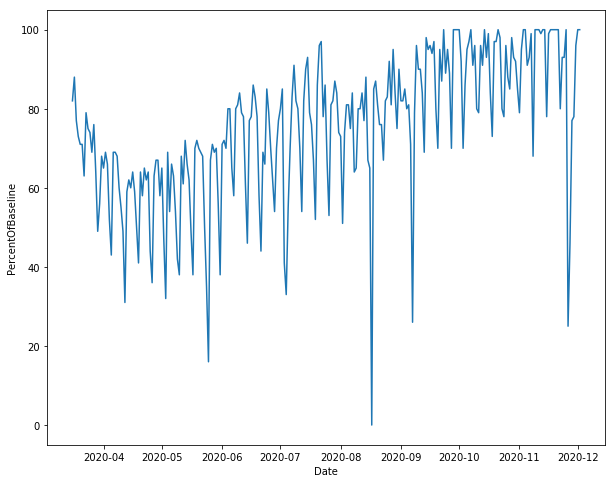

In [94]:
plt.figure(figsize = (10,8))
sns.lineplot(data = USAdata[USAdata['AirportName'] == 'Dallas/Fort Worth International '], x = 'Date', y = 'PercentOfBaseline')